### Problem Statement
Use the dataset in assignment 4 (Abalone Dataset).
- Load the data from data file.  
- Explore the shape of dataset.  
- Summarize the properties in the training dataset. Write findings from column description.  
- Check the dataset for any missing values, impute the missing values and also print out the correlation matrix.  
- Split data into train, test sets.  
- Predict ring class as classification problem using Naive Bayes and Decision Tree Classifier.  
- Calculate the accuracy score of the two models for both training and test data set.  
- Display confusion matrix.  
- Display the classification report.  
- Compare the two models based on accuracy score and classification report and give your reasoning on which is the best model in this case.  

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
columns = ['sex','length','diameter','height','weight_a','weight_b','weight_c','weight_d','rings']
df = pd.read_csv('abalone_data.csv',names=columns)
df.head()

,sex,length,diameter,height,weight_a,weight_b,weight_c,weight_d,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4177 non-null   object 
 1   length    4177 non-null   float64
 2   diameter  4177 non-null   float64
 3   height    4177 non-null   float64
 4   weight_a  4177 non-null   float64
 5   weight_b  4177 non-null   float64
 6   weight_c  4177 non-null   float64
 7   weight_d  4177 non-null   float64
 8   rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,length,diameter,height,weight_a,weight_b,weight_c,weight_d,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='rings', ylabel='Density'>

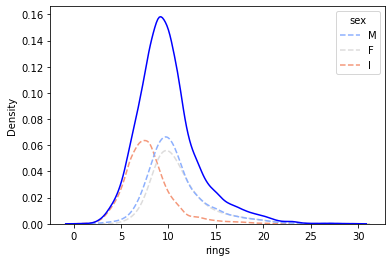

In [6]:
sns.kdeplot(data=df,x='rings',hue='sex',palette='coolwarm',linestyle='dashed')
sns.kdeplot(data=df,x='rings',label='rings',color='blue')

Age column (dividing rings col. into three classes A,B,C)

<AxesSubplot:>

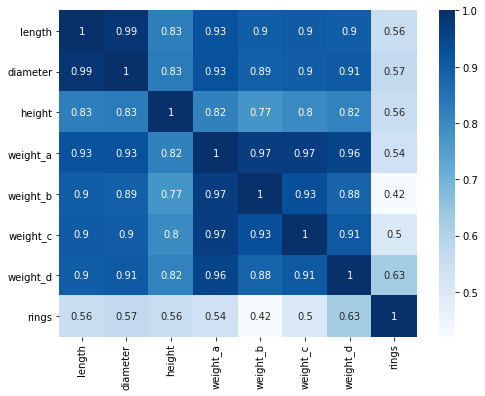

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<AxesSubplot:ylabel='weight_d'>

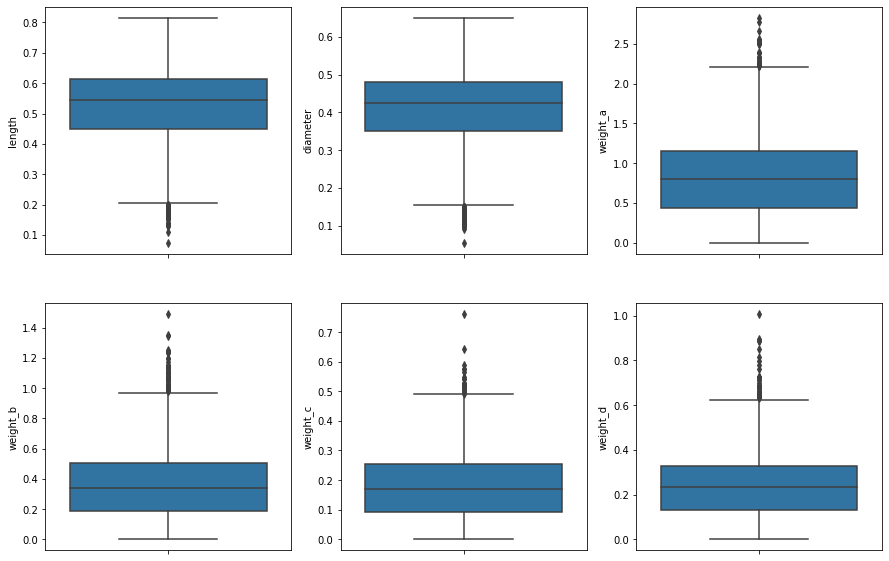

In [8]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
sns.boxplot(y='length',data=df,ax=axes[0][0])
sns.boxplot(y='diameter',data=df,ax=axes[0][1])
sns.boxplot(y='weight_a',data=df,ax=axes[0][2])
sns.boxplot(y='weight_b',data=df,ax=axes[1][0])
sns.boxplot(y='weight_c',data=df,ax=axes[1][1])
sns.boxplot(y='weight_d',data=df,ax=axes[1][2])

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

length      0.1650
diameter    0.1300
height      0.0500
weight_a    0.7115
weight_b    0.3160
weight_c    0.1595
weight_d    0.1990
rings       3.0000
dtype: float64


Dropping Outliners

In [10]:
for column in df.drop(columns='sex'):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print(column)
    print('\tIQR:',iqr)
    print('\tDropped Rows',df[ (df[column] < (q1 - 1.5 * iqr)) | (df[column] > (q3 + 15 * iqr)) ][column].count())
    df.drop(df[ (df[column] < (q1 - 1.5 * iqr)) | (df[column] > (q3 + 15 * iqr)) ].index,inplace=True)

length
	IQR: 0.16499999999999998
	Dropped Rows 49
diameter
	IQR: 0.13
	Dropped Rows 12
height
	IQR: 0.05
	Dropped Rows 4
weight_a
	IQR: 0.70575
	Dropped Rows 0
weight_b
	IQR: 0.31349999999999995
	Dropped Rows 0
weight_c
	IQR: 0.158125
	Dropped Rows 0
weight_d
	IQR: 0.195
	Dropped Rows 0
rings
	IQR: 3.0
	Dropped Rows 2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4110 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4110 non-null   object 
 1   length    4110 non-null   float64
 2   diameter  4110 non-null   float64
 3   height    4110 non-null   float64
 4   weight_a  4110 non-null   float64
 5   weight_b  4110 non-null   float64
 6   weight_c  4110 non-null   float64
 7   weight_d  4110 non-null   float64
 8   rings     4110 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 321.1+ KB


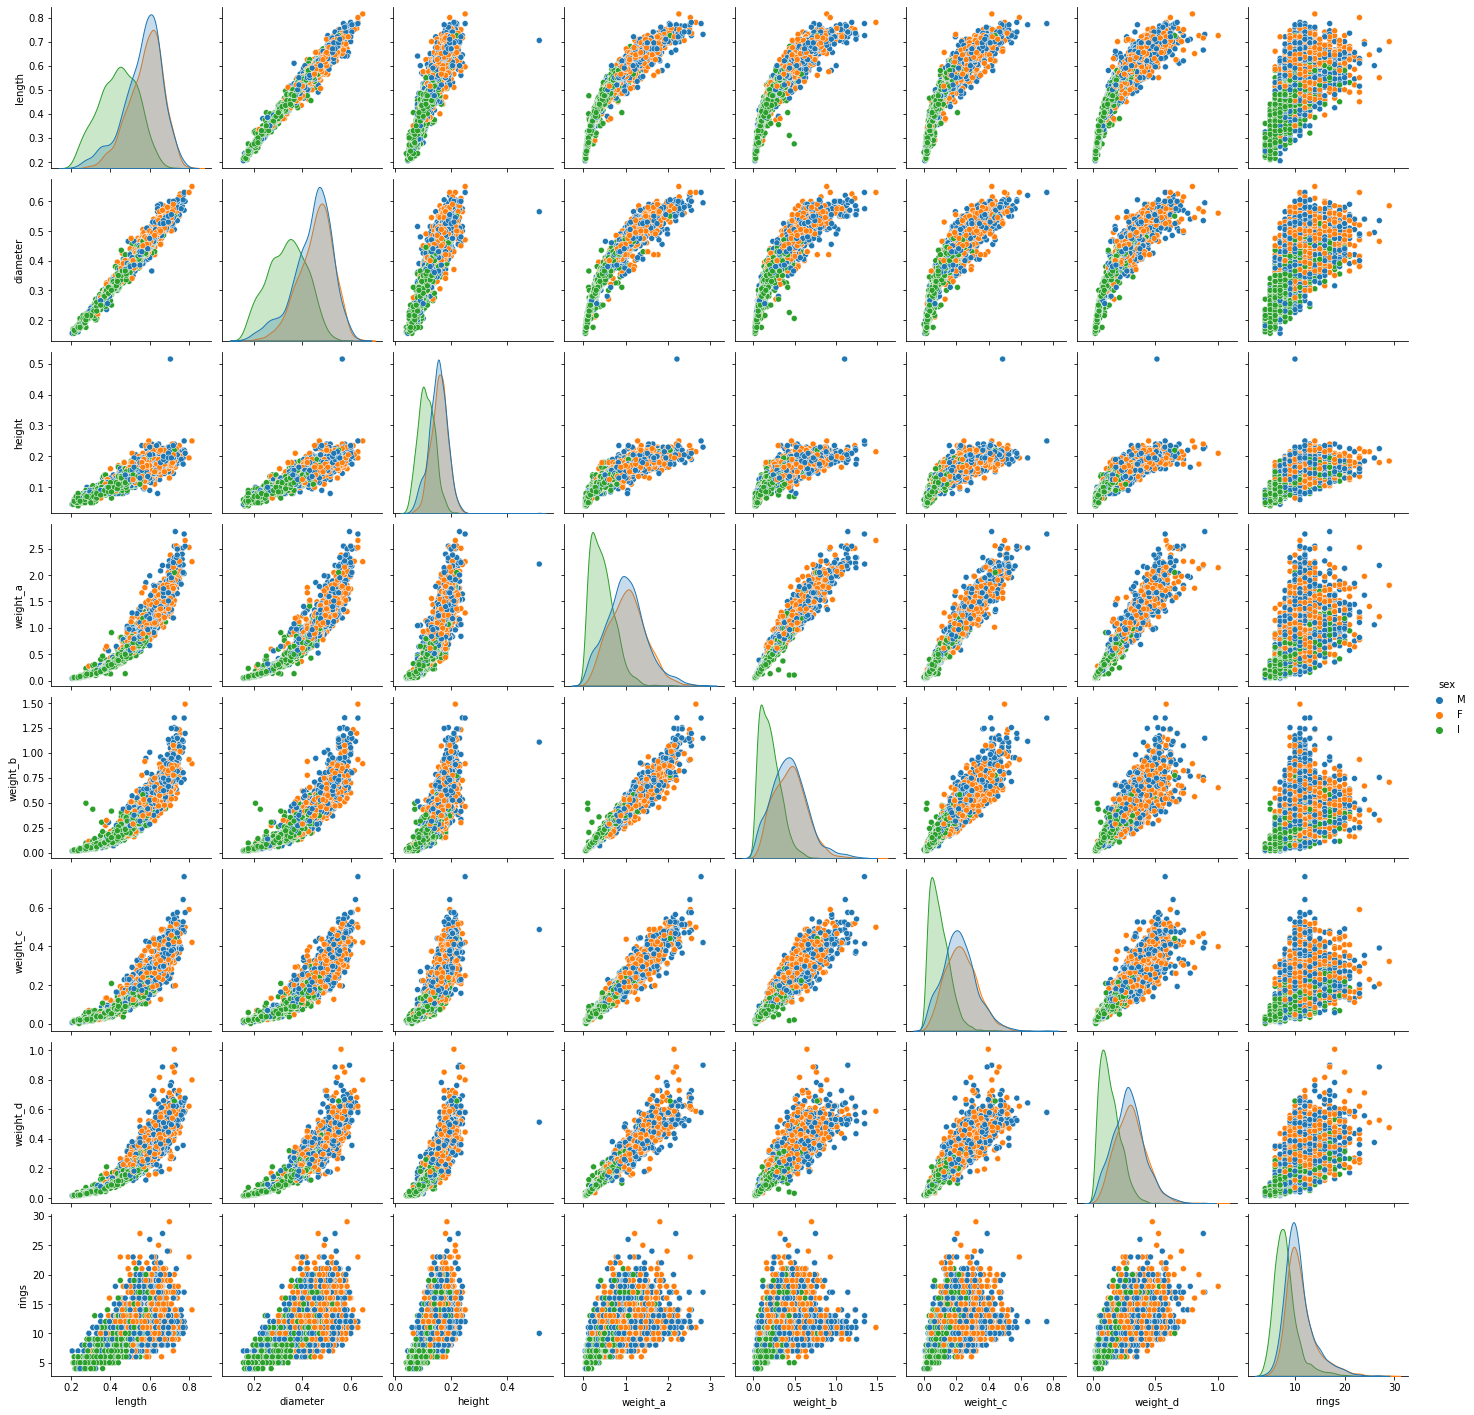

In [12]:
sns.pairplot(data=df,hue='sex')

In [13]:
x =  df[['length','diameter','height','weight_a','weight_b','weight_c','weight_d']]
y = df['rings']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=73)

**Naive Bayes Classifier**

In [14]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [15]:
nb_model.score(x_train,y_train)

0.24409734834725755

In [16]:
nb_model.score(x_test,y_test)

0.2417096536477524

In [17]:
nb_test = nb_model.predict(x_test)
nb_test

array([10, 11,  9, ...,  9, 11,  5])

Residual Plot


<AxesSubplot:xlabel='rings'>

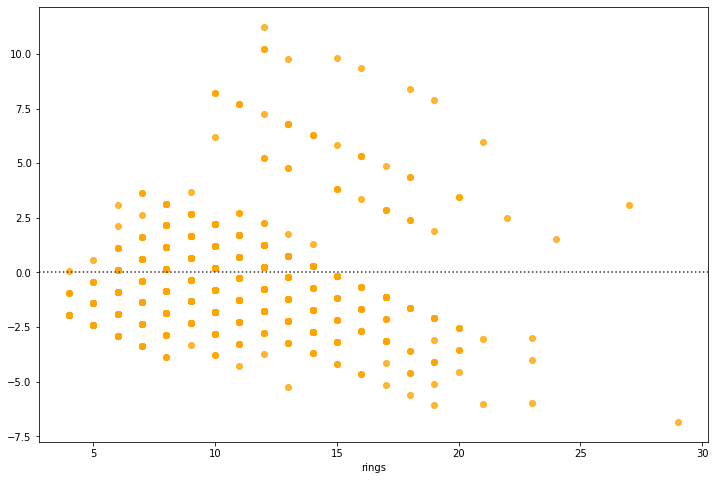

In [18]:
print('Residual Plot')
fig = plt.figure(figsize=(12,8))
sns.residplot(x=y_test,y=nb_test,color='orange')

Text(0.5, 87.0, 'Predicted')

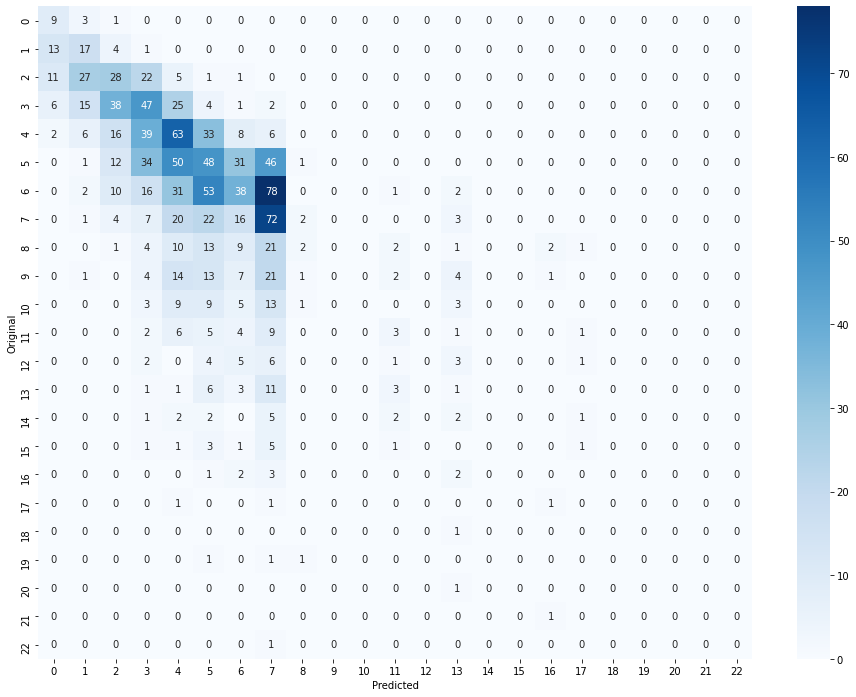

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test,nb_test)),cmap='Blues',annot=True,fmt='d')
plt.ylabel('Original')
plt.xlabel('Predicted')

In [20]:
print(metrics.classification_report(y_test,nb_test,zero_division=False))

              precision    recall  f1-score   support

           4       0.22      0.69      0.33        13
           5       0.23      0.49      0.31        35
           6       0.25      0.29      0.27        95
           7       0.26      0.34      0.29       138
           8       0.26      0.36      0.31       173
           9       0.22      0.22      0.22       223
          10       0.29      0.16      0.21       231
          11       0.24      0.49      0.32       147
          12       0.25      0.03      0.05        66
          13       0.00      0.00      0.00        68
          14       0.00      0.00      0.00        43
          15       0.20      0.10      0.13        31
          16       0.00      0.00      0.00        22
          17       0.04      0.04      0.04        26
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00        13
          20       0.00      0.00      0.00         8
          21       0.00    

**Decision Tree Classifier**

In [21]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
dt_model.score(x_train,y_train)

0.2695241554667635

In [23]:
dt_model.score(x_test,y_test)

0.2417096536477524

In [24]:
dt_test = dt_model.predict(x_test)
dt_test

array([ 9, 11,  9, ...,  9, 11,  7])

Residual Plot


<AxesSubplot:xlabel='rings'>

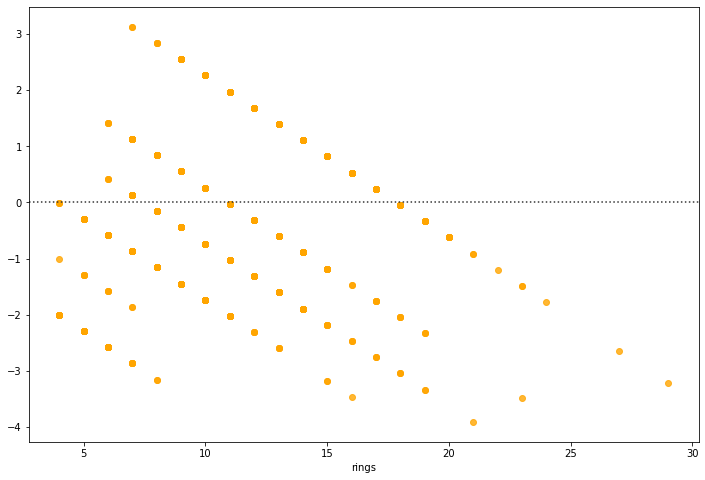

In [25]:
print('Residual Plot')
fig = plt.figure(figsize=(12,8))
sns.residplot(x=y_test,y=dt_test,color='orange')

Text(0.5, 87.0, 'Predicted')

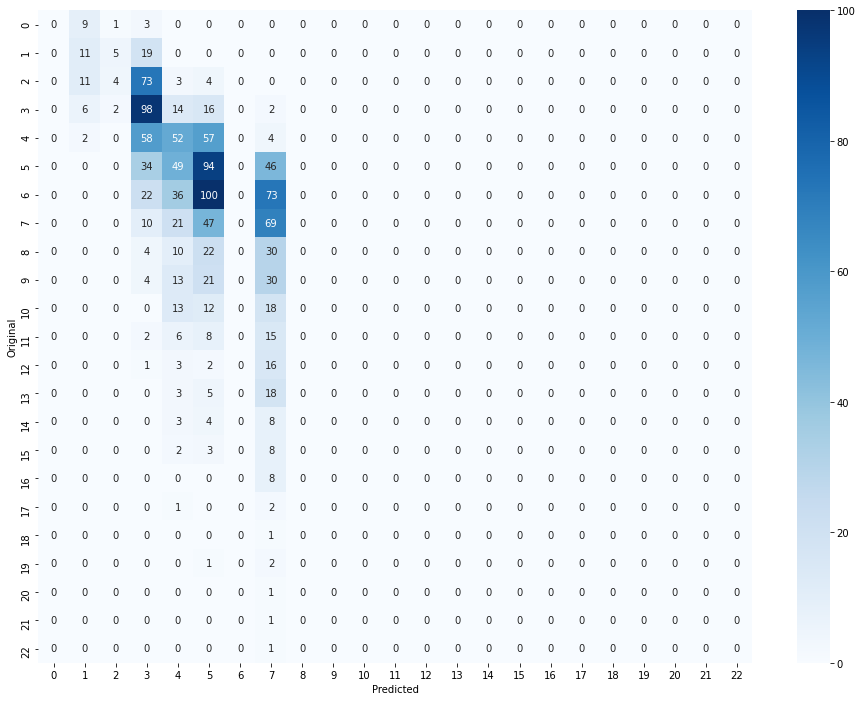

In [26]:
plt.figure(figsize=(16,12))
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test,dt_test)),cmap='Blues',annot=True,fmt='d')
plt.ylabel('Original')
plt.xlabel('Predicted')

In [27]:
print(metrics.classification_report(y_test,dt_test,zero_division=False))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.28      0.31      0.30        35
           6       0.33      0.04      0.07        95
           7       0.30      0.71      0.42       138
           8       0.23      0.30      0.26       173
           9       0.24      0.42      0.30       223
          10       0.00      0.00      0.00       231
          11       0.20      0.47      0.28       147
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        68
          14       0.00      0.00      0.00        43
          15       0.00      0.00      0.00        31
          16       0.00      0.00      0.00        22
          17       0.00      0.00      0.00        26
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00        13
          20       0.00      0.00      0.00         8
          21       0.00    